In [1]:
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# with open('backup/df_results.pkl', 'rb') as f:
with open('df_results_fixed.pkl', 'rb') as f:
    df_dict = pickle.load(f)
df = pd.DataFrame(df_dict)
df['Test'] = df['Test'].astype(str)
df['Train'] = df['Train'].astype(str)
df['Umap - 10'] = df['Umap - 10'].astype(str)
df

Classifier                                          Umap - 10  \
0      RandomForest                                              ['-']   
1               SVC                                              ['-']   
2               KNN                                              ['-']   
3      RandomForest                                              ['-']   
4               SVC                                              ['-']   
...             ...                                                ...   
11515           SVC  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11516           KNN  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11517  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11518           SVC  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11519           KNN  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   

                                                   Train         Test  \
0                                              ['KuHar']        KuHar   
1                                              ['KuHar']        KuHar   
2                                              ['KuHar']        KuHar   
3                                              ['KuHar']  MotionSense   
4                                              ['KuHar']  MotionSense   
...                                                  ...          ...   
11515  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...        WISDM   
11516  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...        WISDM   
11517  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...          UCI   
11518  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...          UCI   
11519  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...          UCI   

       accuracy - mean  accuracy - std  f1 score (weighted) - mean  \
0             0.890650        0.010670                    0.891111   
1             0.719512        0.000000                    0.664217   
2             0.792683        0.000000                    0.794425   
3             0.471368        0.010422                    0.403572   
4             0.508547        0.000000                    0.442792   
...                ...             ...                         ...   
11515         0.652369        0.000000                    0.687058   
11516         0.664822        0.000000                    0.701279   
11517         0.744858        0.005916                    0.743761   
11518         0.605067        0.000000                    0.584226   
11519         0.692996        0.000000                    0.694864   

       f1 score (weighted) - std  f1-score - mean - sit  \
0                       0.010635               0.958266   
1                       0.000000               0.666667   
2                       0.000000               0.850575   
3                       0.014187               0.404629   
4                       0.000000               0.672941   
...                          ...                    ...   
11515                   0.000000               0.681712   
11516                   0.000000               0.705882   
11517                   0.005741               0.642643   
11518                   0.000000               0.569832   
11519                   0.000000               0.547945   

       f1-score - mean - stand  ...  support - mean - stair down  \
0                     0.958801  ...                         41.0   
1                     0.000000  ...                         41.0   
2                     0.831169  ...                         41.0   
3                     0.629148  ...                        156.0   
4                     0.301508  ...                        156.0   
...                        ...  ...                          ...   
11515                 0.579323  ...                          NaN   
11516                 0.659227  ...                          NaN   
11517                 0.615823  ...                        126.0   
11518        

In [3]:
datasets = df['Test'].unique()
datasets

array(['KuHar', 'MotionSense', 'WISDM', 'UCI'], dtype=object)

In [4]:
def boxplot(df, title, y):
    fig = go.Figure()
    for elem in y:
        fig.add_trace(
            go.Box(y=df[elem], name=elem),
            # go.Scatter (
            #     hovertext=datasets
            # )
        )
    fig.update_layout(
        title=title,

    )
    fig.update_yaxes(range = [0., 1.])
    fig.show()

In [5]:
y = [
    'f1 score (weighted) - mean',
    'f1-score - mean - sit', 
    'f1-score - mean - stand',
    'f1-score - mean - walk', 
    'f1-score - mean - stair up',
    'f1-score - mean - stair down', 
    'f1-score - mean - run',
    'f1-score - mean - stair up and down'
]


## Obs: 

- The charts below show the dsitributiosns of f1 score mean (total and per class) with/without each test data on train data. Note that we can only calculate the metric score to classes that appear on test data.

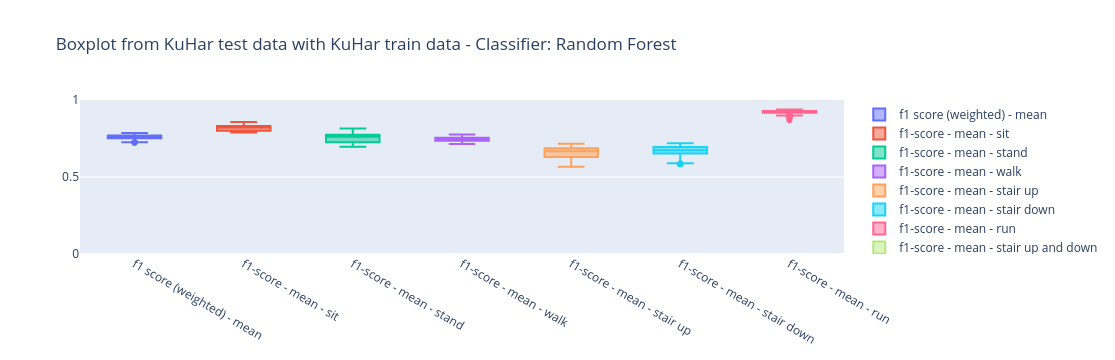

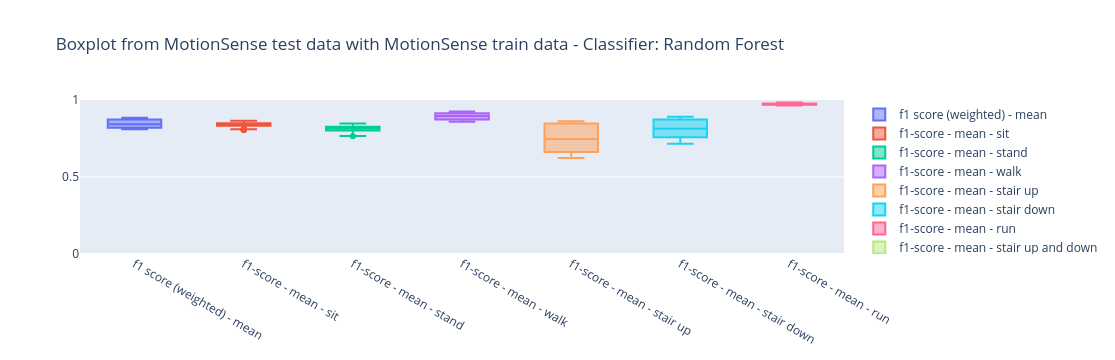

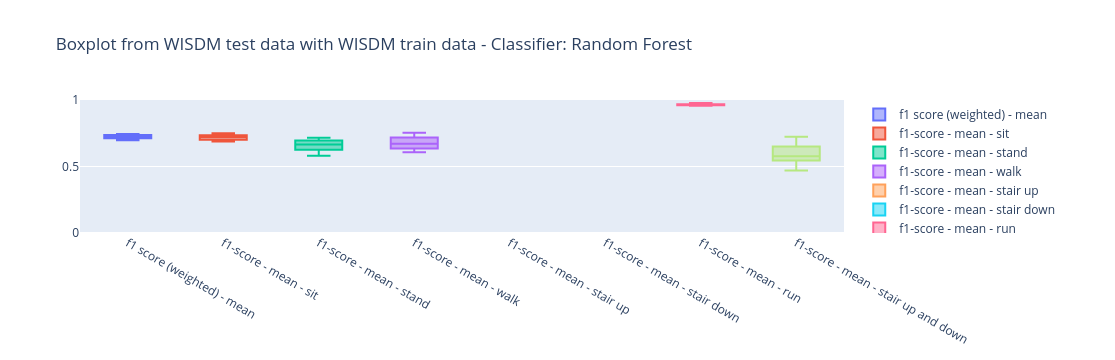

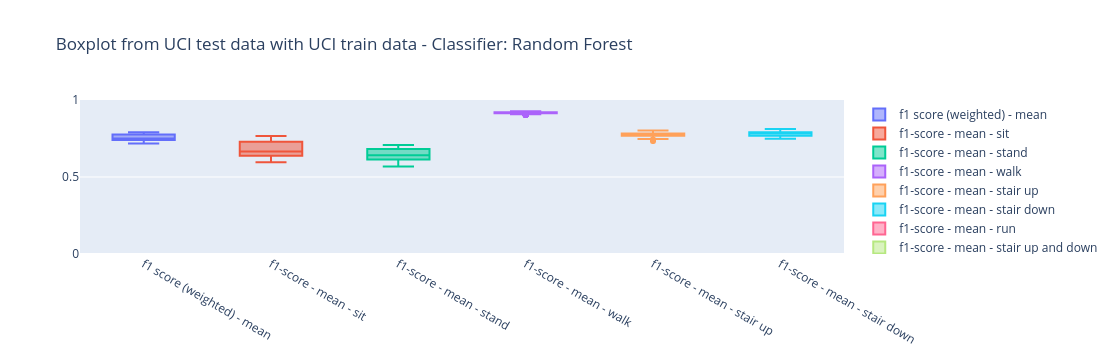

In [6]:
x = 'Test'
for data in datasets:

    train = [elem for elem in df['Train'].unique() if data in elem]
    new_df = df.loc[(df['Test'] == data) & (df['Classifier'] == 'RandomForest') & (df['Train'].isin(train)) & (df['Umap - 10'] != "['-']")]
    title = f'Boxplot from {data} test data with {data} train data - Classifier: Random Forest'
    # title = f'Dataset: {data}'
    boxplot(new_df, title, y)

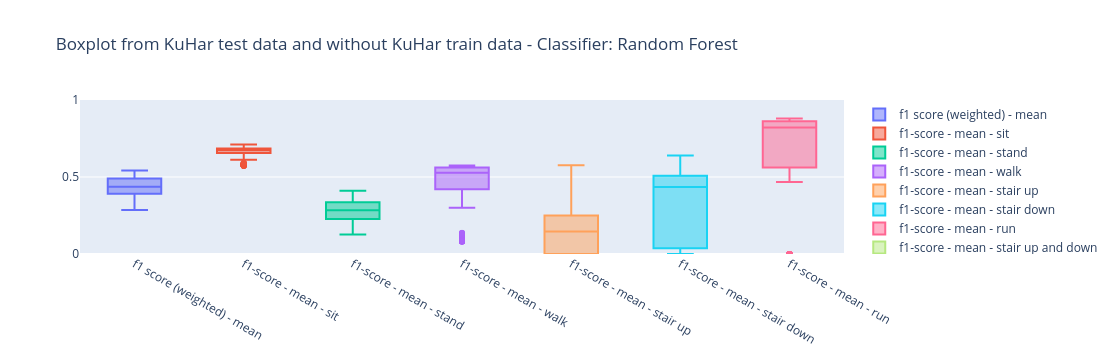

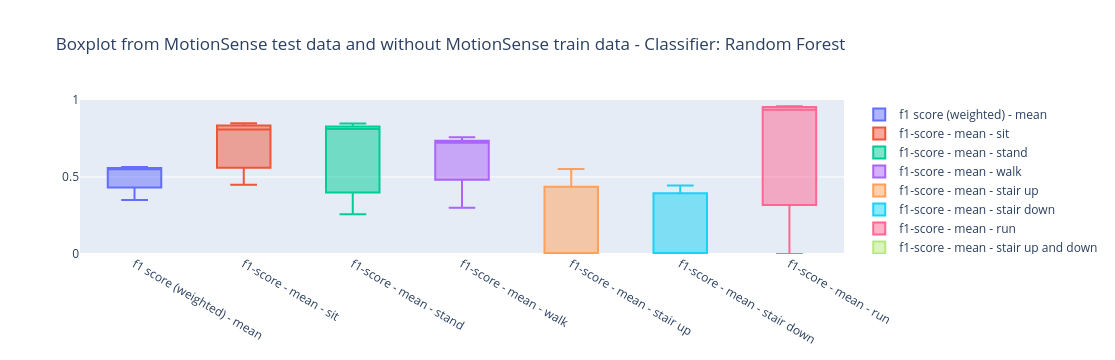

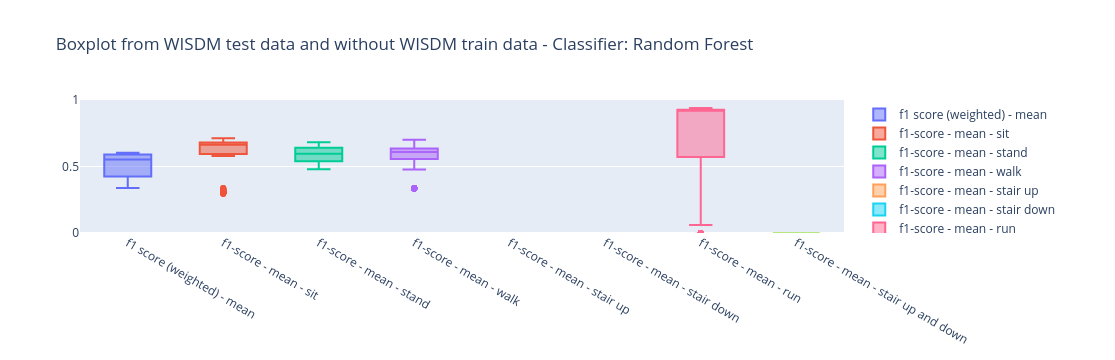

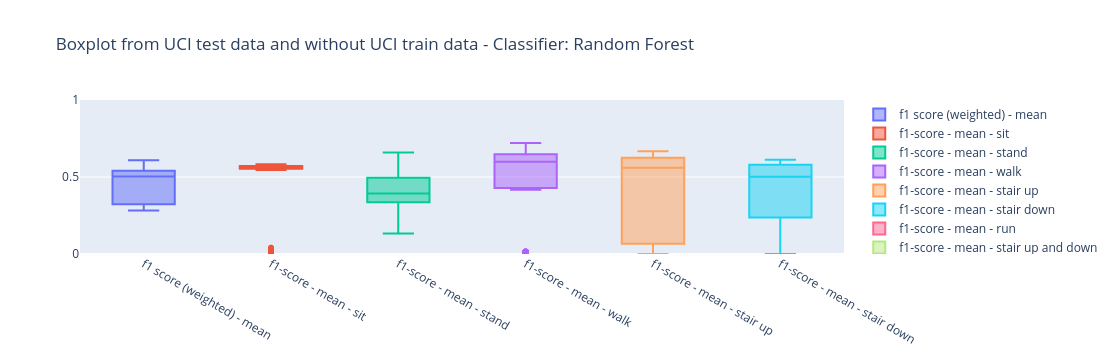

In [7]:
x = 'Test'
for data in datasets:

    train = [elem for elem in df['Train'].unique() if data not in elem]
    new_df = df.loc[(df['Test'] == data) & (df['Classifier'] == 'RandomForest') & (df['Train'].isin(train)) & (df['Umap - 10'] != "['-']")]
    title = f'Boxplot from {data} test data and without {data} train data - Classifier: Random Forest'
    # title = f'Dataset: {data}'
    boxplot(new_df, title, y)

## Conclusions

1. When the test data don't appear on train data the score down.
2. Classes stair up/down sometimes have a terrible score (probably when WISDM appear on train data).
3. The best score when data appear on train and test data was with MotionSense - 88.42\%.
4. The worst score when data appear on train and test data was with WISDM - 69.80\%.
5. The best score when data appear only on test data was with UCI-HAR and WISDM - 61\%.
6. The worst score when data appear only on test data was with KuHar and UCI-HAR - 28\%.
7. When it only test with MotionSense and the run score is zero? It probably occurs when we haven't the class run on train data (We just have on train UCI or UCI and ExtraSensory). 

## Verifying the point 7 above

In [8]:
new_df = df.loc[(df['f1-score - mean - run'] == 0) & (df['Classifier'] == 'RandomForest') & (df['Umap - 10'] != "['-']")]
new_df.iloc[:,:15]

Classifier                                          Umap - 10  \
396    RandomForest                                          ['KuHar']   
399    RandomForest                                          ['KuHar']   
402    RandomForest                                          ['KuHar']   
504    RandomForest                                          ['KuHar']   
507    RandomForest                                          ['KuHar']   
...             ...                                                ...   
11196  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11199  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11202  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11304  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11307  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   

                         Train         Test  accuracy - mean  accuracy - std  \
396                    ['UCI']        KuHar         0.405691        0.007451   
399                    ['UCI']  MotionSense         0.434829        0.005384   
402                    ['UCI']        WISDM         0.319889        0.002010   
504    ['ExtraSensory', 'UCI']        KuHar         0.377642        0.006667   
507    ['ExtraSensory', 'UCI']  MotionSense         0.409722        0.004687   
...                        ...          ...              ...             ...   
11196                  ['UCI']        KuHar         0.408537        0.004165   
11199                  ['UCI']  MotionSense         0.434081        0.002908   
11202                  ['UCI']        WISDM         0.321273        0.003078   
11304  ['ExtraSensory', 'UCI']        KuHar         0.375610        0.006851   
11307  ['ExtraSensory', 'UCI']  MotionSense         0.397009        0.004970   

       f1 score (weighted) - mean  f1 score (weighted) - std  \
396                      0.312447                   0.011472   
399                      0.382544                   0.006353   
402                      0.339063                   0.001958   
504                      0.302842                   0.007936   
507                      0.364236                   0.004917   
...                           ...                        ...   
11196                    0.313670                   0.006233   
11199                    0.382768                   0.004124   
11202                    0.340158                   0.003443   
11304                    0.308072                   0.007904   
11307                    0.351343                   0.005394   

       f1-score - mean - sit  f1-score - mean - stand  f1-score - mean - walk  \
396                 0.683030                 0.185609                0.452569   
399                 0.643410                 0.272619                0.440886   
402                 0.642903                 0.539039                0.479466   
504                 0.652702                 0.150666                0.340595   
507                 0.653330                 0.327368                0.465653   
...                      ...                      ...                     ...   
11196               0.685091                 0.178640                0.456955   
11199               0.640581                 0.278214                0.437138   
11202               0.647332                 0.539951                0.479494   
11304               0.646900                 0.264474                0.319159   
11307               0.662757                 0.319642                0.413034   

       f1-score - mean - stair up  f1-score - mean - stair down  \
396                      0.135887                      0.417589   
399                      0.543244                      0.395104   
402                           NaN                           NaN   
504                      0.212990                      0.460102   
507                      0.408529                      0.330535   
...            

In [9]:
 new_df['Train'].unique()

array(["['UCI']", "['ExtraSensory', 'UCI']"], dtype=object)

## Questions

- Make sense use f1-score or accuracy for crossDatasets? 
- Is f1-score mean is a good metric to evaluate the experiment? 
  - R: No, we need look to f1-score per class.

In [10]:
new_df = df.loc[(df['Test'] == 'UCI') & (df['Classifier'] == 'RandomForest') & (df['Train'].isin(train)) & (df['Umap - 10'] != "['-']") & (df['f1-score - mean - sit'] < 0.5)]
new_df

Classifier                                          Umap - 10  \
369    RandomForest                                          ['KuHar']   
429    RandomForest                                          ['KuHar']   
729    RandomForest                                    ['MotionSense']   
789    RandomForest                                    ['MotionSense']   
1089   RandomForest                                   ['ExtraSensory']   
...             ...                                                ...   
10509  RandomForest          ['KuHar', 'ExtraSensory', 'WISDM', 'UCI']   
10809  RandomForest    ['MotionSense', 'ExtraSensory', 'WISDM', 'UCI']   
10869  RandomForest    ['MotionSense', 'ExtraSensory', 'WISDM', 'UCI']   
11169  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11229  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   

                           Train Test  accuracy - mean  accuracy - std  \
369                    ['KuHar']  UCI         0.574367        0.003210   
429    ['KuHar', 'ExtraSensory']  UCI         0.571535        0.002235   
729                    ['KuHar']  UCI         0.574814        0.003269   
789    ['KuHar', 'ExtraSensory']  UCI         0.572131        0.003678   
1089                   ['KuHar']  UCI         0.573174        0.003210   
...                          ...  ...              ...             ...   
10509  ['KuHar', 'ExtraSensory']  UCI         0.566617        0.002966   
10809                  ['KuHar']  UCI         0.575261        0.003054   
10869  ['KuHar', 'ExtraSensory']  UCI         0.577794        0.003200   
11169                  ['KuHar']  UCI         0.573920        0.004493   
11229  ['KuHar', 'ExtraSensory']  UCI         0.568405        0.004278   

       f1 score (weighted) - mean  f1 score (weighted) - std  \
369                      0.503244                   0.003458   
429                      0.499141                   0.002445   
729                      0.503528                   0.003887   
789                      0.501001                   0.004619   
1089                     0.502203                   0.003443   
...                           ...                        ...   
10509                    0.497587                   0.002760   
10809                    0.504694                   0.003232   
10869                    0.506581                   0.003845   
11169                    0.502485                   0.005119   
11229                    0.494132                   0.004467   

       f1-score - mean - sit  f1-score - mean - stand  ...  \
369                 0.029877                 0.658971  ...   
429                 0.013793                 0.653835  ...   
729                 0.028544                 0.658813  ...   
789                 0.024658                 0.655117  ...   
1089                0.031210                 0.659130  ...   
...                      ...                      ...  ...   
10509               0.034107                 0.656363  ...   
10809               0.031210                 0.659130  ...   
10869               0.024676                 0.656519  ...   
11169               0.027211                 0.658654  ...   
11229               0.001379                 0.651559  ...   

       support - mean - stair down  support - mean - run  \
369                          126.0                   NaN   
429                          126.0                   NaN   
729                          126.0                   NaN   
789                          126.0                   NaN   
1089                         126.0                   NaN   
...                            ...                   ...   
10509                        126.0                   NaN   
10809                        126.0                   NaN   
10869                        126.0                   NaN   
11169                        126.0                   NaN   
11229                        126.0                   NaN 

In [11]:
new_df['Train'].unique()

array(["['KuHar']", "['KuHar', 'ExtraSensory']"], dtype=object)

In [12]:
df2 = df.loc[(df['Classifier'] == 'RandomForest') & (df['Umap - 10'] != "['-']") & (df['f1-score - mean - sit'] >= 0.5) & (df['f1-score - mean - stand'] >= 0.27) & (df['f1-score - mean - walk'] >= 0.52) & 
                (df['f1-score - mean - stair up'] >= 0.0) & (df['f1-score - mean - stair down'] >= 0.0) & (df['f1-score - mean - run'] >= 0.82)]
df2['Train'].unique()

array(["['KuHar']", "['MotionSense']", "['WISDM']",
       "['KuHar', 'MotionSense']", "['KuHar', 'ExtraSensory']",
       "['KuHar', 'WISDM']", "['KuHar', 'UCI']",
       "['MotionSense', 'ExtraSensory']", "['MotionSense', 'WISDM']",
       "['MotionSense', 'UCI']", "['ExtraSensory', 'WISDM']",
       "['WISDM', 'UCI']", "['KuHar', 'MotionSense', 'ExtraSensory']",
       "['KuHar', 'MotionSense', 'WISDM']",
       "['KuHar', 'MotionSense', 'UCI']",
       "['KuHar', 'ExtraSensory', 'WISDM']",
       "['KuHar', 'ExtraSensory', 'UCI']", "['KuHar', 'WISDM', 'UCI']",
       "['MotionSense', 'ExtraSensory', 'WISDM']",
       "['MotionSense', 'ExtraSensory', 'UCI']",
       "['MotionSense', 'WISDM', 'UCI']",
       "['ExtraSensory', 'WISDM', 'UCI']",
       "['KuHar', 'MotionSense', 'ExtraSensory', 'WISDM']",
       "['KuHar', 'MotionSense', 'ExtraSensory', 'UCI']",
       "['KuHar', 'MotionSense', 'WISDM', 'UCI']",
       "['KuHar', 'ExtraSensory', 'WISDM', 'UCI']",
       "['MotionSense',

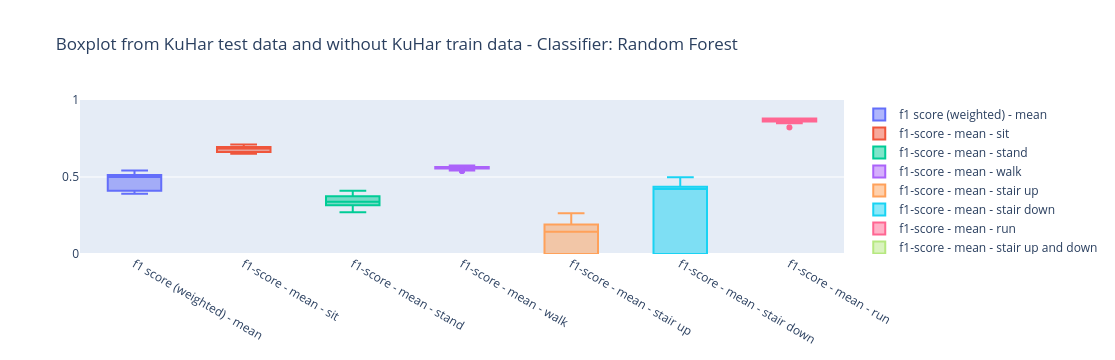

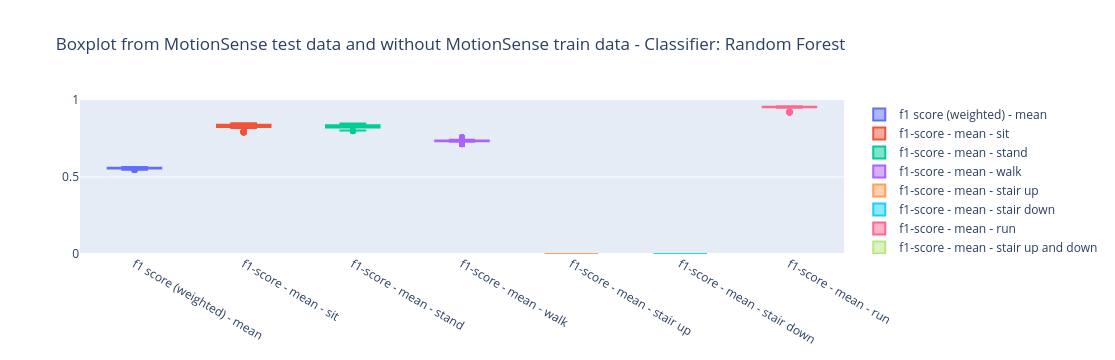

Empty
Empty


In [13]:
x = 'Test'
for data in datasets:

    train = [elem for elem in df2['Train'].unique() if data not in elem]
    new_df = df2.loc[(df2['Test'] == data) & (df2['Train'].isin(train))]
    title = f'Boxplot from {data} test data and without {data} train data - Classifier: Random Forest'
    # title = f'Dataset: {data}'
    boxplot(new_df, title, y) if new_df.shape[0] != 0 else print('Empty')

In [14]:
df3 = df.loc[(df['Classifier'] == 'RandomForest') & (df['Umap - 10'] != "['-']") & (df['f1-score - mean - sit'] >= 0.5) & (df['f1-score - mean - stand'] >= 0.27) & (df['f1-score - mean - walk'] >= 0.52) & 
                (df['f1-score - mean - stair up'] >= 0.0) & (df['f1-score - mean - stair down'] >= 0.0) & (df['f1-score - mean - run'] >= 0.82) & (df['Test'].isin(['KuHar', 'MotionSense']))]
df3['Train'].unique()

array(["['KuHar']", "['MotionSense']", "['WISDM']",
       "['KuHar', 'MotionSense']", "['KuHar', 'ExtraSensory']",
       "['KuHar', 'WISDM']", "['KuHar', 'UCI']",
       "['MotionSense', 'ExtraSensory']", "['MotionSense', 'WISDM']",
       "['MotionSense', 'UCI']", "['ExtraSensory', 'WISDM']",
       "['WISDM', 'UCI']", "['KuHar', 'MotionSense', 'ExtraSensory']",
       "['KuHar', 'MotionSense', 'WISDM']",
       "['KuHar', 'MotionSense', 'UCI']",
       "['KuHar', 'ExtraSensory', 'WISDM']",
       "['KuHar', 'ExtraSensory', 'UCI']", "['KuHar', 'WISDM', 'UCI']",
       "['MotionSense', 'ExtraSensory', 'WISDM']",
       "['MotionSense', 'ExtraSensory', 'UCI']",
       "['MotionSense', 'WISDM', 'UCI']",
       "['ExtraSensory', 'WISDM', 'UCI']",
       "['KuHar', 'MotionSense', 'ExtraSensory', 'WISDM']",
       "['KuHar', 'MotionSense', 'ExtraSensory', 'UCI']",
       "['KuHar', 'MotionSense', 'WISDM', 'UCI']",
       "['KuHar', 'ExtraSensory', 'WISDM', 'UCI']",
       "['MotionSense',

In [15]:
df3

Classifier                                          Umap - 10  \
360    RandomForest                                          ['KuHar']   
375    RandomForest                                          ['KuHar']   
384    RandomForest                                          ['KuHar']   
387    RandomForest                                          ['KuHar']   
408    RandomForest                                          ['KuHar']   
...             ...                                                ...   
11487  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11496  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11499  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11508  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11511  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   

                                                   Train         Test  \
360                                            ['KuHar']        KuHar   
375                                      ['MotionSense']  MotionSense   
384                                            ['WISDM']        KuHar   
387                                            ['WISDM']  MotionSense   
408                             ['KuHar', 'MotionSense']        KuHar   
...                                                  ...          ...   
11487          ['KuHar', 'ExtraSensory', 'WISDM', 'UCI']  MotionSense   
11496    ['MotionSense', 'ExtraSensory', 'WISDM', 'UCI']        KuHar   
11499    ['MotionSense', 'ExtraSensory', 'WISDM', 'UCI']  MotionSense   
11508  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...        KuHar   
11511  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...  MotionSense   

       accuracy - mean  accuracy - std  f1 score (weighted) - mean  \
360           0.768293        0.003149                    0.769030   
375           0.883226        0.002747                    0.881881   
384           0.424390        0.003726                    0.407805   
387           0.589530        0.002938                    0.557771   
408           0.778455        0.003277                    0.778534   
...                ...             ...                         ...   
11487         0.575855        0.003345                    0.546465   
11496         0.526423        0.006863                    0.520065   
11499         0.788355        0.003590                    0.813101   
11508         0.742276        0.006851                    0.746722   
11511         0.793590        0.003338                    0.817241   

       f1 score (weighted) - std  f1-score - mean - sit  \
360                     0.003155               0.834592   
375                     0.002795               0.851528   
384                     0.006649               0.683600   
387                     0.002844               0.832891   
408                     0.003281               0.853433   
...                          ...                    ...   
11487                   0.003426               0.791237   
11496                   0.009763               0.664859   
11499                   0.002477               0.845460   
11508                   0.006498               0.810488   
11511                   0.003213               0.841146   

       f1-score - mean - stand  ...  support - mean - stair down  \
360                   0.779477  ...                         41.0   
375                   0.814966  ...                        156.0   
384                   0.349306  ...                         41.0   
387                   0.821209  ...                        156.0   
408                   0.808991  ...                         41.0   
...                        ...  ...                          ...   
11487                 0.803109  ...                        156.0   
11496                 0.326096  ...                         41.0   
11499                 0.821064  ...                        156.0   
11508        

## New analyze

Now, let's remove KuHar, ExtraSensory, and UCI from train data and analyze results withou test data on train data.

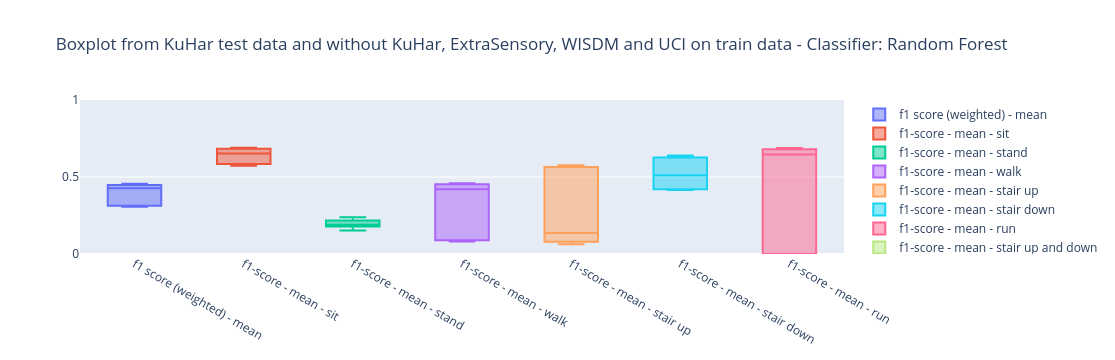

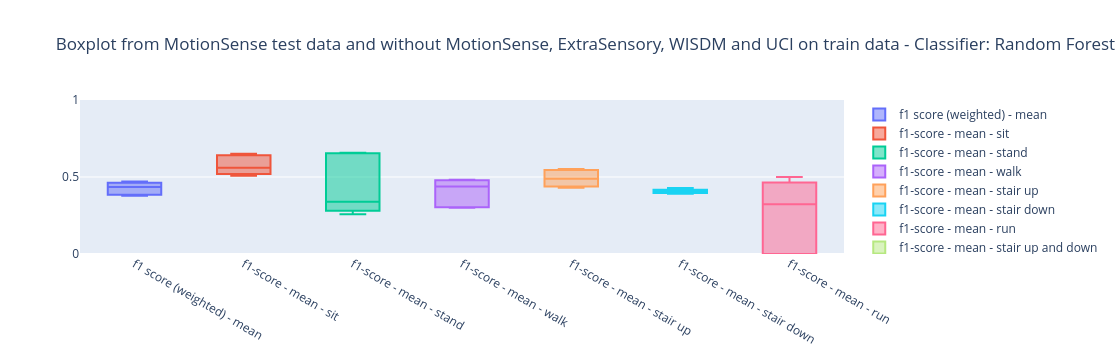

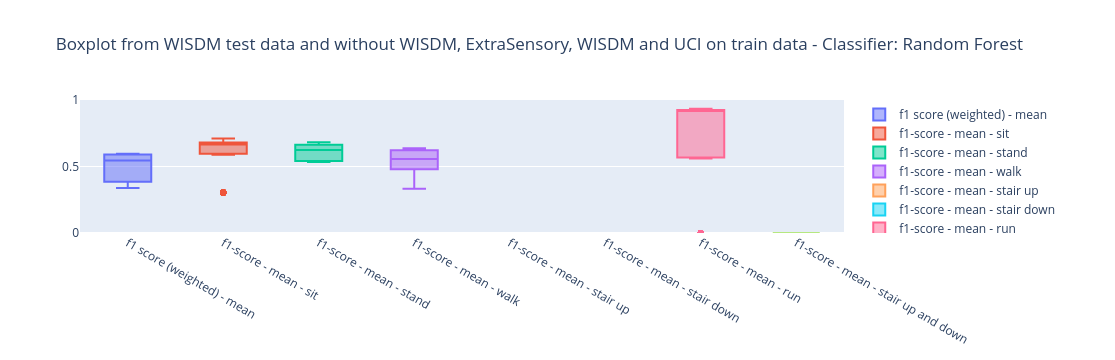

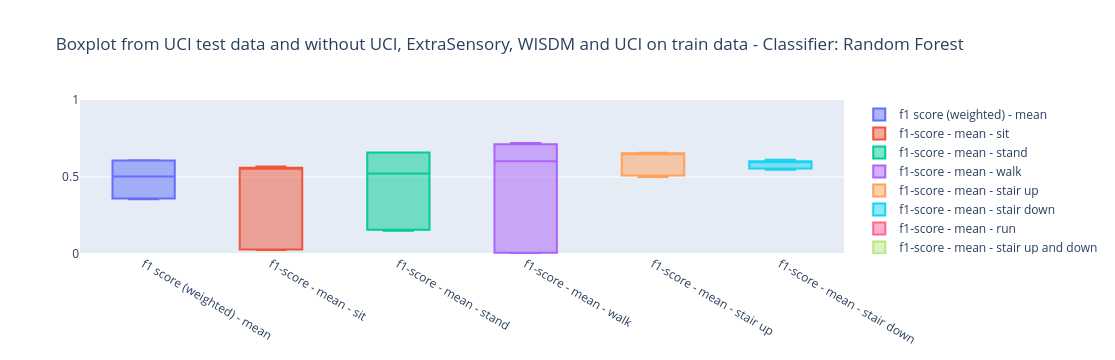

In [16]:
x = 'Test'
for data in datasets:

    train = [elem for elem in df['Train'].unique() if (data not in elem) and ('ExtraSensory' not in elem) and ('WISDM' not in elem)]
    new_df = df.loc[(df['Test'] == data) & (df['Classifier'] == 'RandomForest') & (df['Train'].isin(train)) & (df['Umap - 10'] != "['-']")]
    title = f'Boxplot from {data} test data and without {data}, ExtraSensory, WISDM and UCI on train data - Classifier: Random Forest'
    # title = f'Dataset: {data}'
    boxplot(new_df, title, y)